In [16]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

## Input DataSet

In [17]:
def file_type():
    while True:
        try:
            path = input('Please Enter The DataSet Path and Extension: ')

            if path.endswith(('.csv', '.xlsx')):
                file_name, file_extension = os.path.splitext(path)
                file_name = 'The name of the file: ' + file_name
                file_extension = 'The extension of the file: ' + file_extension
                print(file_name + '\n' + file_extension)

                data = pd.read_csv(path)
                return data

            else:
                print('File Extension must be .xlsx or .csv')

        except FileNotFoundError:
            print('We Can’t Find This File !!!')


data = file_type()
# print(data)

Please Enter The DataSet Path and Extension:  ../input/data-police-shootings/fatal-police-shootings-data.csv


The name of the file: ../input/data-police-shootings/fatal-police-shootings-data
The extension of the file: .csv


## Exploratory Data Anlaysis For Entire DataSet

In [18]:
def EDA(data):

    print('\nExploratory Data Analysis For Entire Dataset: ')
    print('---------------------------------------------------------------------------------')

    print('Number of Rows: ', data.shape[0])
    print('Number of Features: ', data.shape[1])
    print('---------------------------------------------------------------------------------')

    print('SubSet of Data:\n ', data.head().to_string())
    print('---------------------------------------------------------------------------------')

    print('\nData Information: ')
    print(data.info())
    print('---------------------------------------------------------------------------------')

    print('\nData Describe:\n ', data.describe())
    print('---------------------------------------------------------------------------------')

    print('\nColumns Names: ')
    print(data.columns)
    print('---------------------------------------------------------------------------------')

    # Null Values
    print('\nNull Values :\n', data.isnull().any())
    print('Number of Null Values :\n', data.isnull().sum())
    print('---------------------------------------------------------------------------------')

    # Duplicated Values
    print('\nDuplicated Values : ')
    print(data.duplicated().sum())
    print('---------------------------------------------------------------------------------')

    # Variables Types
    print('\nVariables Types : ')
    numeric_columns = list(data.select_dtypes(include=['int64', 'float64']).columns.values)
    print('Number of Numerical Variables : ', len(numeric_columns))
    categorical_columns = list(data.select_dtypes(include=['object']).columns.values)
    print('Number of Categorical Variables : ', len(categorical_columns))
    print('---------------------------------------------------------------------------------')

    # Data Correlation
    print('\nData Correlation : ')
    print(data.corr())
    print('---------------------------------------------------------------------------------')

    # Data Cleaning

    # Drop missing values
    data.dropna(inplace=True, axis=0)
    print('\nData After Drop missing Values :')
    print(data.shape)
    print('---------------------------------------------------------------------------------')

    # Drop Duplicated Values
    data.drop_duplicates(inplace=True)
    print('\nData After Drop Duplicated Values :')
    print(data.shape)
    print('---------------------------------------------------------------------------------')

    
print(EDA(data))


Exploratory Data Analysis For Entire Dataset: 
---------------------------------------------------------------------------------
Number of Rows:  5416
Number of Features:  14
---------------------------------------------------------------------------------
SubSet of Data:
     id                name        date   manner_of_death       armed   age gender race           city state  signs_of_mental_illness threat_level         flee  body_camera
0   3          Tim Elliot  2015-01-02              shot         gun  53.0      M    A        Shelton    WA                     True       attack  Not fleeing        False
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0      M    W          Aloha    OR                    False       attack  Not fleeing        False
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0      M    H        Wichita    KS                    False        other  Not fleeing        False
3   8     Matthew Hoffman  2015-01-04   

## EDA For Numerical Features

The Number of Numerical Columns:  2

Columns Exploration : 

Description of id
----------------------------------------------------------------------------
count    4399.000000
mean     2882.397363
std      1694.386003
min         3.000000
25%      1402.500000
50%      2832.000000
75%      4345.500000
max      5925.000000
Name: id, dtype: float64

Subset values ofid
----------------------------------------------------------------------------
0    3
1    4
2    5
3    8
4    9
Name: id, dtype: int64

Statistical values of id
----------------------------------------------------------------------------
Minimum :  3
Maximum :  5925
Mean value :  2882.3973630370538
Median value :  2832.0
Standard deviation :  1694.3860029831953

Null Values of id
----------------------------------------------------------------------------
Null values :  False
Null values :  0

Duplicated Values of id
----------------------------------------------------------------------------
Duplicated Values :  0

Quartil

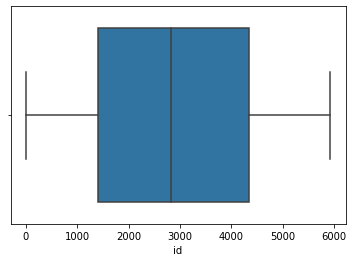


dist plot of id
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

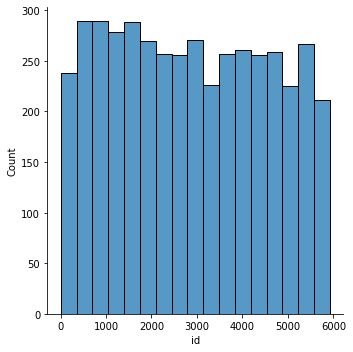


Histogram of id
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

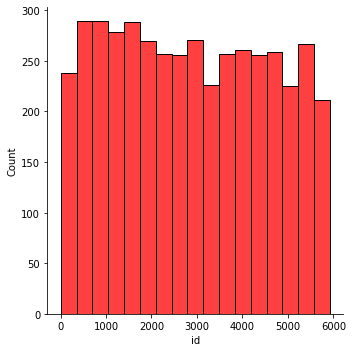


Histogram with mean, median and mode of id
----------------------------------------------------------------------------
Mean:  2882.3973630370538 
Median:  2832.0 
Mode:  3


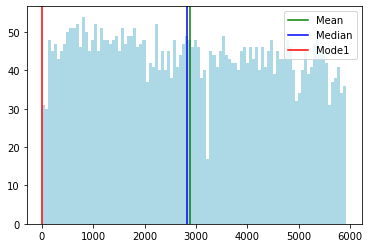


Skewness of id
----------------------------------------------------------------------------
0.06957188370057646

This Column is Finished !!
 Let’s start a new one


Description of age
----------------------------------------------------------------------------
count    4399.000000
mean       36.632871
std        12.803017
min         6.000000
25%        27.000000
50%        34.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

Subset values ofage
----------------------------------------------------------------------------
0    53.0
1    47.0
2    23.0
3    32.0
4    39.0
Name: age, dtype: float64

Statistical values of age
----------------------------------------------------------------------------
Minimum :  6.0
Maximum :  91.0
Mean value :  36.63287110706979
Median value :  34.0
Standard deviation :  12.803017411990506

Null Values of age
----------------------------------------------------------------------------
Null values :  False
Null values :  0

Dupli

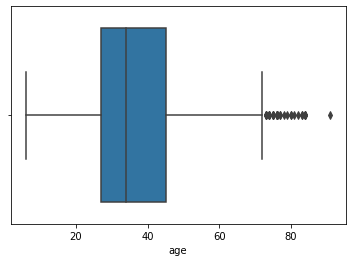


dist plot of age
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

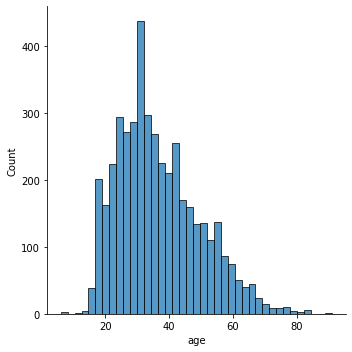


Histogram of age
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

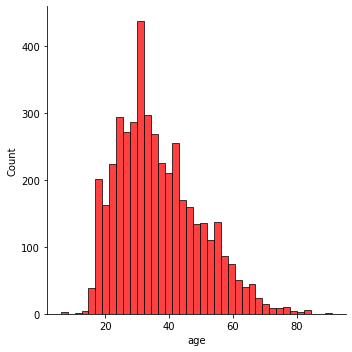


Histogram with mean, median and mode of age
----------------------------------------------------------------------------
Mean:  36.63287110706979 
Median:  34.0 
Mode:  25.0


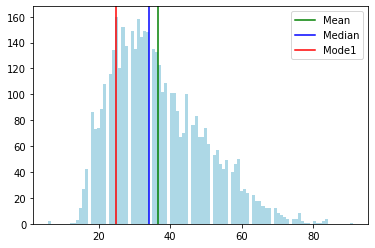


Skewness of age
----------------------------------------------------------------------------
0.7023594674808746

This Column is Finished !!
 Let’s start a new one



In [19]:
def NumericalDataAnalysis(column):
    # Columns Exploration
    print("\nDescription of " + column)
    print("----------------------------------------------------------------------------")
    print(data[column].describe())

    # Subset of column values
    print('\nSubset values of' + column)
    print("----------------------------------------------------------------------------")
    print(data[column].head())
    
    
    # Statistical Values
    print("\nStatistical values of " + column)
    print("----------------------------------------------------------------------------")
    print('Minimum : ', data[column].min())
    print('Maximum : ', data[column].max())
    print('Mean value : ', data[column].mean())
    print('Median value : ', data[column].median())
    print('Standard deviation : ', data[column].std())

    # Null Values
    print('\nNull Values of ' + column)
    print("----------------------------------------------------------------------------")
    print('Null values : ', data[column].isnull().any())
    print('Null values : ', data[column].isnull().sum().sum())

    # Duplicated Values
    print('\nDuplicated Values of ' + column)
    print("----------------------------------------------------------------------------")
    print('Duplicated Values : ', data[column].duplicated().sum())

    # Quartiles
    print("\nQuartile of " + column)
    print("----------------------------------------------------------------------------")
    Q1 = data[column].quantile(q=0.25)
    Q3 = data[column].quantile(q=0.75)
    print('1st Quartile (Q1) is: ', Q1)
    print('3st Quartile (Q3) is: ', Q3)
    print('Interquartile range (IQR) is ', stats.iqr(data[column]))

    # outliers
    print("\nOutlier detection from Interquartile range (IQR) " + column)
    print("----------------------------------------------------------------------------")
    L_outliers = Q1 - 1.5 * (Q3 - Q1)
    U_outliers = Q3 + 1.5 * (Q3 - Q1)
    print('Lower outliers range: ', L_outliers)
    print('Upper outliers range: ', U_outliers)
    print('Number of outliers in upper : ', data[data[column] > U_outliers][column].count())
    print('Number of outliers in lower : ', data[data[column] < L_outliers][column].count())
    print('% of Outlier in upper: ', round(data[data[column] > U_outliers][column].count() * 100 / len(data)), '%')
    print('% of Outlier in lower: ', round(data[data[column] < L_outliers][column].count() * 100 / len(data)), '%')
    
    


    # boxplot
    plt.figure()
    print("\nBoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=data[column])
    plt.show()

    # dist plot
    plt.figure()
    print("\ndist plot of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(data[column])
    plt.show()

    # histogram
    plt.figure()
    print("\nHistogram of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(data[column], kde=False, color='red')
    plt.show()

    # Plotting mean, median and mode
    plt.figure()
    print("\nHistogram with mean, median and mode of " + column)
    print("----------------------------------------------------------------------------")
    mean = data[column].mean()
    median = data[column].median()
    mode = data[column].mode()

    print('Mean: ', mean, '\nMedian: ', median, '\nMode: ', mode[0])
    plt.hist(data[column], bins=100, color='lightblue')  # Plot the histogram
    plt.axvline(mean, color='green',
                label='Mean')  # Draw lines on the plot for mean median and the two modes we have in GRE Score
    plt.axvline(median, color='blue', label='Median')
    plt.axvline(mode[0], color='red', label='Mode1')
    plt.legend()
    plt.show()

    # Skewness
    print("\nSkewness of " + column)
    print("----------------------------------------------------------------------------")
    print(data[column].skew())

    print('\nThis Column is Finished !!\n Let’s start a new one\n')


# categorical_columns = list(data.select_dtypes(include=['object']).columns.values)
# print('Number of Categorical Variables : ', len(categorical_columns))

# for i in categorical_columns:
#     _labelEncoding(i)

    
numerical_data = data.select_dtypes(include=['float64', 'int64'])
numeric_columns = list(numerical_data.columns.values)
print('The Number of Numerical Columns: ', len(numeric_columns))

print('\n Numerical Columns Exploration : ')
for x in numeric_columns:
    NumericalDataAnalysis(x)

## EDA For Categorical Data

The Number of categorical Columns :  10

 Categorical Columns Exploration : 

Description of name
----------------------------------------------------------------------------
count      4399
unique     4377
top       TK TK
freq          9
Name: name, dtype: object

Subset values ofname
----------------------------------------------------------------------------
0            Tim Elliot
1      Lewis Lee Lembke
2    John Paul Quintero
3       Matthew Hoffman
4     Michael Rodriguez
Name: name, dtype: object
\Values Count of : name
----------------------------------------------------------------------------
TK TK                       9
Michael Ferguson            2
Miguel Mercado Segura       2
Timothy Leroy Harrington    2
Robert Edwards              2
                           ..
Paula Dell Phillips         1
Michael Peacor              1
Levonia Riggins             1
Lyle Patrick Blanchard      1
Nicholas Hirsh              1
Name: name, Length: 4377, dtype: int64


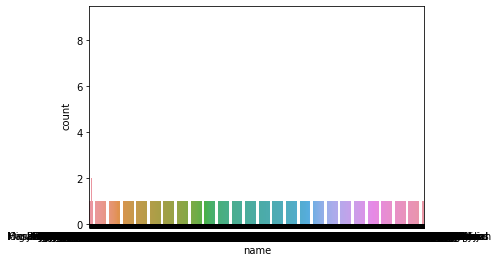


Description of date
----------------------------------------------------------------------------
count           4399
unique          1733
top       2018-01-06
freq               9
Name: date, dtype: object

Subset values ofdate
----------------------------------------------------------------------------
0    2015-01-02
1    2015-01-02
2    2015-01-03
3    2015-01-04
4    2015-01-04
Name: date, dtype: object
\Values Count of : date
----------------------------------------------------------------------------
2018-01-06    9
2015-07-07    8
2018-04-05    8
2019-01-28    8
2018-04-01    8
             ..
2019-01-20    1
2019-01-18    1
2016-10-19    1
2016-10-20    1
2020-06-15    1
Name: date, Length: 1733, dtype: int64


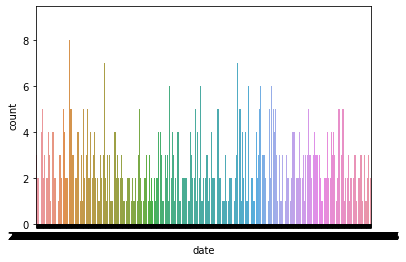


Description of manner_of_death
----------------------------------------------------------------------------
count     4399
unique       2
top       shot
freq      4169
Name: manner_of_death, dtype: object

Subset values ofmanner_of_death
----------------------------------------------------------------------------
0                shot
1                shot
2    shot and Tasered
3                shot
4                shot
Name: manner_of_death, dtype: object
\Values Count of : manner_of_death
----------------------------------------------------------------------------
shot                4169
shot and Tasered     230
Name: manner_of_death, dtype: int64


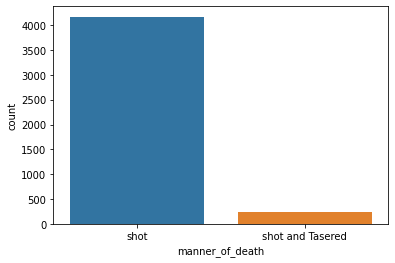


Description of armed
----------------------------------------------------------------------------
count     4399
unique      90
top        gun
freq      2596
Name: armed, dtype: object

Subset values ofarmed
----------------------------------------------------------------------------
0           gun
1           gun
2       unarmed
3    toy weapon
4      nail gun
Name: armed, dtype: object
\Values Count of : armed
----------------------------------------------------------------------------
gun                    2596
knife                   660
unarmed                 336
toy weapon              165
vehicle                 117
                       ... 
pepper spray              1
metal rake                1
oar                       1
machete and gun           1
car, knife and mace       1
Name: armed, Length: 90, dtype: int64


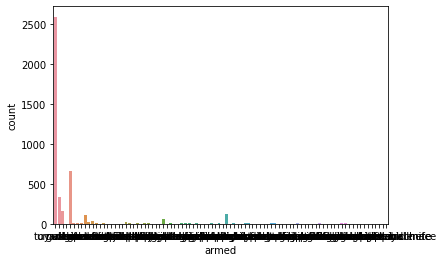


Description of gender
----------------------------------------------------------------------------
count     4399
unique       2
top          M
freq      4202
Name: gender, dtype: object

Subset values ofgender
----------------------------------------------------------------------------
0    M
1    M
2    M
3    M
4    M
Name: gender, dtype: object
\Values Count of : gender
----------------------------------------------------------------------------
M    4202
F     197
Name: gender, dtype: int64


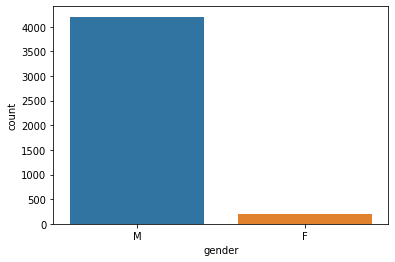


Description of race
----------------------------------------------------------------------------
count     4399
unique       6
top          W
freq      2253
Name: race, dtype: object

Subset values ofrace
----------------------------------------------------------------------------
0    A
1    W
2    H
3    W
4    H
Name: race, dtype: object
\Values Count of : race
----------------------------------------------------------------------------
W    2253
B    1164
H     786
A      83
N      70
O      43
Name: race, dtype: int64


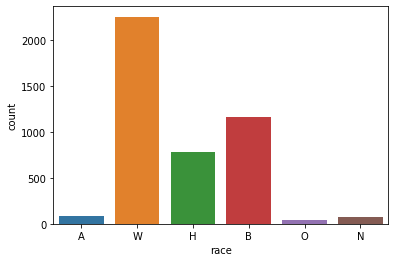


Description of city
----------------------------------------------------------------------------
count            4399
unique           2116
top       Los Angeles
freq               62
Name: city, dtype: object

Subset values ofcity
----------------------------------------------------------------------------
0          Shelton
1            Aloha
2          Wichita
3    San Francisco
4            Evans
Name: city, dtype: object
\Values Count of : city
----------------------------------------------------------------------------
Los Angeles        62
Phoenix            60
Houston            45
Las Vegas          38
San Antonio        34
                   ..
Elberton            1
North St. Louis     1
Edmonton            1
Peterson            1
Crown Point         1
Name: city, Length: 2116, dtype: int64


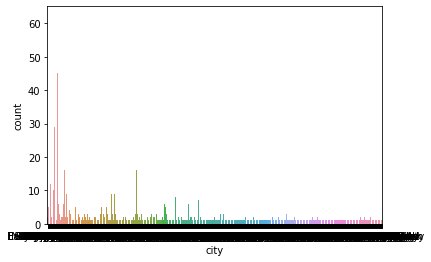


Description of state
----------------------------------------------------------------------------
count     4399
unique      51
top         CA
freq       623
Name: state, dtype: object

Subset values ofstate
----------------------------------------------------------------------------
0    WA
1    OR
2    KS
3    CA
4    CO
Name: state, dtype: object
\Values Count of : state
----------------------------------------------------------------------------
CA    623
TX    383
FL    294
AZ    200
CO    153
GA    146
NC    137
OK    137
OH    133
TN    114
WA    113
MO    112
IL     88
LA     87
IN     87
PA     86
AL     85
VA     85
NY     85
WI     82
NM     81
NV     76
KY     73
SC     71
OR     67
MI     67
MD     66
AR     64
MN     56
UT     54
NJ     52
MS     52
KS     46
WV     37
ID     34
AK     33
MA     30
IA     29
HI     23
MT     22
NE     22
ME     17
CT     17
DC     13
WY     13
SD     13
NH     12
ND     10
DE      9
VT      8
RI      2
Name: state, dtype: int64


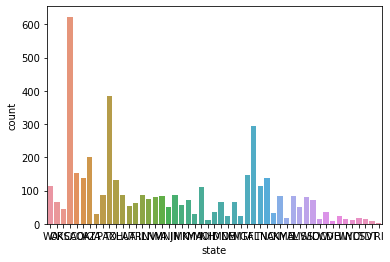


Description of threat_level
----------------------------------------------------------------------------
count       4399
unique         3
top       attack
freq        2911
Name: threat_level, dtype: object

Subset values ofthreat_level
----------------------------------------------------------------------------
0    attack
1    attack
2     other
3    attack
4    attack
Name: threat_level, dtype: object
\Values Count of : threat_level
----------------------------------------------------------------------------
attack          2911
other           1322
undetermined     166
Name: threat_level, dtype: int64


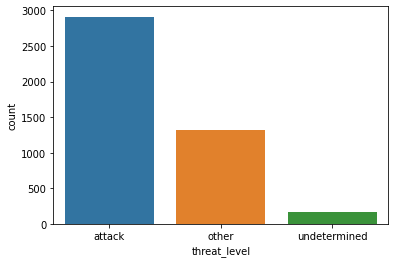


Description of flee
----------------------------------------------------------------------------
count            4399
unique              4
top       Not fleeing
freq             2965
Name: flee, dtype: object

Subset values offlee
----------------------------------------------------------------------------
0    Not fleeing
1    Not fleeing
2    Not fleeing
3    Not fleeing
4    Not fleeing
Name: flee, dtype: object
\Values Count of : flee
----------------------------------------------------------------------------
Not fleeing    2965
Car             657
Foot            630
Other           147
Name: flee, dtype: int64


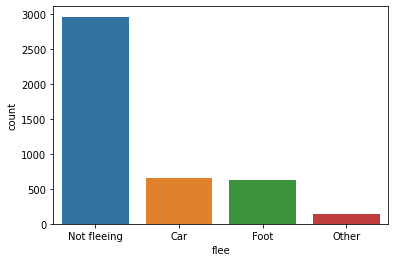

In [22]:
def CategoricalDataAnalysis(column):
    # Columns Exploration
    print("\nDescription of " + column)
    print("----------------------------------------------------------------------------")
    print(data[column].describe())

    # Subset of column values
    print('\nSubset values of ' + column)
    print("----------------------------------------------------------------------------")
    print(data[column].head())
    
    # Values count
    print('\Values Count of : ' + column)
    print("----------------------------------------------------------------------------")
    print(data[column].value_counts())
    
    # Box Plot
    sns.countplot(x=data[column], data=data)
    plt.show()

categorical_data = data.select_dtypes(include=['object'])
categorical_columns = list(categorical_data.columns.values)
print('The Number of categorical Columns : ', len(categorical_columns))

print('\n Categorical Columns Exploration : ')
for y in categorical_columns:
    CategoricalDataAnalysis(y)